# 問題
1. `seabornパッケージ`を用いてn_charとlikeの**ヒストグラム**と**散布図**を書いてください。（ただしimageごとに色を分けてください）

2. `sklearn.linear_model.PoissonRegression`はintercept_とcoef_を出力できる。これを用いて、**likeの期待値＝imageとn-charの式**を答えてください。

3. `statsmodelsパッケージ`で②と同様の計算をしてください

4. image=1, n_char=115のツイートのいいね数の**95%予測区間**を作ってください

## 問題①
**seabornパッケージを用いてn_charとlikeのヒストグラムと散布図を書いてください。（ただしimageごとに色を分けてください）**

### Step 1:ライブラリのインポート

In [1]:
#インポート文
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

### Step 2:学習データを作成し、説明変数（X_train）と目的変数（y_train）に分割
drop関数でlikeの列を削除したものと、likeの列のデータセットをそれぞれ`X_train`、`y_train`とする。

In [2]:
#データ作成
df_train = pd.DataFrame(
            data = {"image":[0,0,0,0,0,1,1,1,1,1],
                    "n_char":[100,110,120,130,140,100,110,120,130,140],
                    "like":[0,0,2,1,3,0,3,2,4,3]}
          )
X_train = df_train.drop('like', axis=1)
y_train = df_train['like']

In [3]:
#(不要)確認用
df_train

,image,n_char,like
0,0,100,0
1,0,110,0
2,0,120,2
3,0,130,1
4,0,140,3
5,1,100,0
6,1,110,3
7,1,120,2
8,1,130,4
9,1,140,3


### Step 3:seabornパッケージを用いて学習データのヒストグラムと散布図を作成
pairplot関数を使えば、同時に出力可能。引き数に`hue='image'`でimageの値ごとに色分け。

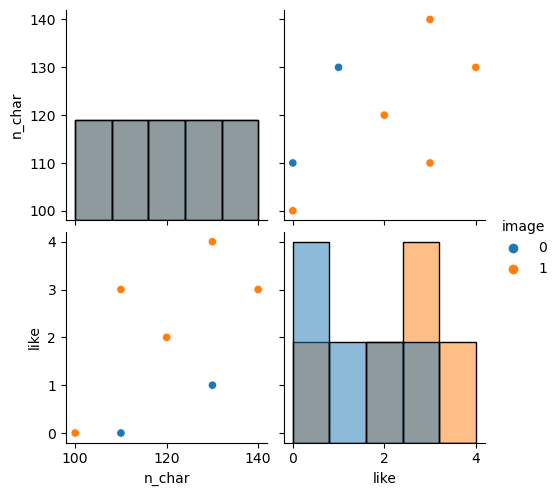

In [4]:
#グラフ作成
sns.pairplot(df_train, hue='image', diag_kind="hist")
plt.show()

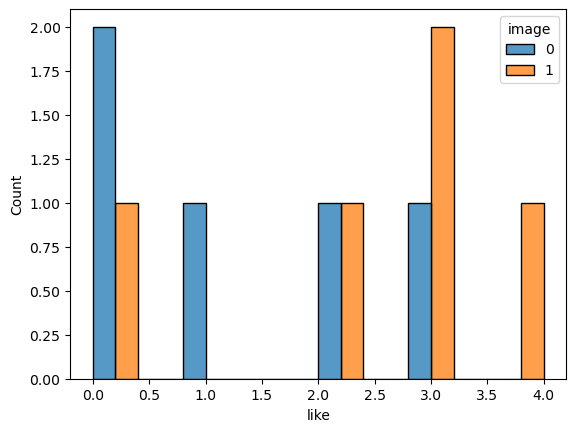

In [5]:
#(不要)拡大版ヒストグラム
sns.histplot(data = df_train,
  x = 'like',
  hue='image',
  multiple = 'dodge',
  bins=10,)
plt.show()

## 問題②
**sklearn.linear_model.PoissonRegressionはintercept_とcoef_を出力できる。これを用いて、likeの期待値＝imageとn-charの式　を答えてください。**

### Step 1: scikit-learnを用いて、モデルを作成
`X_train,y_train`で学習させたモデルを`result_skl`とおく。

In [6]:
#モデル作成
clf = linear_model.PoissonRegressor(
                        alpha=0, 
                      )
result_skl = clf.fit(X_train,y_train)

#スコア
#print("score:", result_skl.score(X_train, y_train))

### Step 2: 切片(intercept)と偏回帰係数(coefficient)を確認
先ほどのモデルの切片と偏回帰係数2つをそれぞれ`inte`,`coef`とおく。


In [7]:
#切片と偏回帰係数
inte = result_skl.intercept_ 
coef = result_skl.coef_ 
print('切片:',inte,'偏回帰係数:',coef)

#λの確認
#lamd0 = np.exp(inte)
#lamd1 = np.exp(inte+coef[0])
#lamd2 = np.exp(inte+coef[1])
#print('λ0:',lamd0,'λ1:',lamd1,'λ2:',lamd2)

#期待値の式
print('E(x) = λ = exp(-4.9953 + 0.6931*image + 0.0417*n-char)')
print('E(x) = λ = exp(切片 + 偏回帰係数[0]*image + 偏回帰係数[1]*n-char)')

切片: -4.995325655977788 偏回帰係数: [0.69314712 0.0417461 ]
E(x) = λ = exp(-4.9953 + 0.6931*image + 0.0417*n-char)
E(x) = λ = exp(切片 + 偏回帰係数[0]*image + 偏回帰係数[1]*n-char)


### Step 3:あってそうか確認
問4で使用する、データを使いモデルの予測値と合ってるかを確認する。

In [8]:
#期待値確認用
def E(image,n_char):
    return np.exp(inte + coef[0]*image + coef[1]*n_char)

E(1,115)

1.6464531686252402

In [9]:
#(不要)期待値確認用②
lamd0 = np.exp(inte)
lamd1 = np.exp(inte+coef[0])
lamd2 = np.exp(inte+coef[1])

def E(image,n_char):
    return lamd0 + lamd1*image + lamd2*n_char

E(1,115)

0.8319899123784682

## 問題③
**statsmodelsパッケージで②と同様の計算をしてください**

### Step 1:statsmodelsでモデル作成
モデルを作成し、`summary()`でサマリーを出す

In [10]:
#statsmodels
result_smf = smf.poisson("like ~ image + n_char", data=df_train).fit()
result_smf.summary()

Optimization terminated successfully.
         Current function value: 1.352168
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                   like   No. Observations:                   10
Model:                        Poisson   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Thu, 26 Jan 2023   Pseudo R-squ.:                  0.2211
Time:                        14:36:05   Log-Likelihood:                -13.522
converged:                       True   LL-Null:                       -17.359
Covariance Type:            nonrobust   LLR p-value:                   0.02154
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9953      2.405     -2.077      0.038      -9.709      -0.282
image          0.6931      0.500      1.386      0.166      -0.287       1.673
n_char         0.0417      0.019      2.251      0.024       0.005       0.078
==============================================================================
"""

## 問題④
**image=1, n_char=115のツイートのいいね数の95%予測区間を作ってください**

### Step 1:予測する
画像あり、文字数115のツイートのデータセットを作成する。そして、先ほど作成したモデルで予測を行う。

In [11]:
#予測
Predict_data = pd.DataFrame(
            data = {"image":[1],
                    "n_char":[115]}
          )

pre_ski = result_skl.predict(Predict_data)
pre_smf = result_smf.predict(Predict_data)
print('sklearnの予測は',pre_ski,'statsmodelsの予測は',pre_smf,)

sklearnの予測は [1.64645317] statsmodelsの予測は 0    1.646453
dtype: float64


###### Step 2:95%区間を推定する
sk-learnで作成したモデルの上記データセット予測を`λ`とおく。

ポアソン分布は

$$E(X)=λ$$
$$V(X)=λ$$
である。


母平均の95%区間

$$\bar{x}-1.96\sqrt{\frac{\sigma ^2}{n}}\le \mu\le \bar{x}+1.96\sqrt{\frac{\sigma ^2}{n}}$$

より

$$λ-1.96\sqrt{\frac{λ}{n}}\le λ\leλ+1.96\sqrt{\frac{λ}{n}}$$

参考：https://stats.stackexchange.com/questions/15371/how-to-calculate-a-confidence-level-for-a-poisson-distribution

In [12]:
#95%
λ=pre_ski
n= 10
UPPER =λ+ 1.96*np.sqrt(λ/n)
LOWER =λ- 1.96*np.sqrt(λ/n)
print(LOWER,'≦λ≦',UPPER)

[0.85115357] ≦λ≦ [2.44175277]
